In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
from selenium import webdriver
import re

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import koreanize_matplotlib

warnings.filterwarnings('ignore')


In [2]:
# 웹툰 홈페이지에서 웹툰에 대한 Code들을 따오는 과정
webtoon_list = []

# 월요일(mon), 화요일(tue), 수요일(wed), 목요일(thu), 금요일(fri), 토요일(sat), 일요일(sun)
DAY_LIST = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
driver = webdriver.Chrome()
for day in DAY_LIST:
    driver.get(f"https://comic.naver.com/webtoon?tab={day}")

    # 페이지 로딩을 위한 대기시간
    time.sleep(2)

    # BeautifulSoup 사용
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # 
    webtoons = soup.select("#content > div:nth-child(1) > ul .Poster__link--sopnC")
    for webtoon in webtoons:
        href = webtoon['href']
        webtoon_list.append(href)
    
driver.quit()

In [3]:
# 데이터 확인
webtoon_list

['/webtoon/list?titleId=819217&tab=mon',
 '/webtoon/list?titleId=648419&tab=mon',
 '/webtoon/list?titleId=817859&tab=mon',
 '/webtoon/list?titleId=733074&tab=mon',
 '/webtoon/list?titleId=183559&tab=mon',
 '/webtoon/list?titleId=783052&tab=mon',
 '/webtoon/list?titleId=728750&tab=mon',
 '/webtoon/list?titleId=602910&tab=mon',
 '/webtoon/list?titleId=796867&tab=mon',
 '/webtoon/list?titleId=739115&tab=mon',
 '/webtoon/list?titleId=795297&tab=mon',
 '/webtoon/list?titleId=654774&tab=mon',
 '/webtoon/list?titleId=774863&tab=mon',
 '/webtoon/list?titleId=806189&tab=mon',
 '/webtoon/list?titleId=796075&tab=mon',
 '/webtoon/list?titleId=817945&tab=mon',
 '/webtoon/list?titleId=813552&tab=mon',
 '/webtoon/list?titleId=801035&tab=mon',
 '/webtoon/list?titleId=759940&tab=mon',
 '/webtoon/list?titleId=818588&tab=mon',
 '/webtoon/list?titleId=761461&tab=mon',
 '/webtoon/list?titleId=772725&tab=mon',
 '/webtoon/list?titleId=814594&tab=mon',
 '/webtoon/list?titleId=21815&tab=mon',
 '/webtoon/list?t

In [4]:
# 정규식으로 데이터 정제
codes = []
for code in webtoon_list:
    match = re.search(r'titleId=(\d+)', code)
    title_id = match.group(1)
    codes.append(title_id)

In [5]:
# 중복된 데이터(여러 요일에 참여하는 웹툰)확인
display(len(codes))

display(len(set(codes)))

651

629

In [6]:
# set으로 중복 제거 -> 순서가 뒤바껴버림..
duplicate_code = set(codes)

네이버 로그인 자동화 - 한 페이지로 쭉~
- 로그인 자동화 참고 : https://mrnoobiest.tistory.com/entry/selenium%EB%84%A4%EC%9D%B4%EB%B2%84-%EB%A1%9C%EA%B7%B8%EC%9D%B8%EC%8B%9C-%EC%9E%90%EB%8F%99%EB%B0%A9%EC%A7%80-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%95%88%EB%9C%A8%EA%B2%8C-%EC%9A%B0%ED%9A%8C%ED%95%98%EA%B8%B0

In [20]:
from selenium import webdriver
import pyautogui
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import pyperclip
from selenium.webdriver.common.keys import Keys
import platform
import time

# 크롬 드라이버 옵션 설정
chrome_options = webdriver.ChromeOptions()

# 새로운 창 생성
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
driver.get('https://naver.com')

# 현재 열려 있는 창 가져오기
current_window_handle = driver.current_window_handle

# <a href class='MyView-module__link_login___HpHMW'> 일때 해당 링크 클릭
driver.find_element(By.XPATH, "//a[@class='MyView-module__link_login___HpHMW']").click()

#새롭게 생성된 탭의 핸들을 찾습니다
#만일 새로운 탭이 없을경우 기존 탭을 사용합니다.
new_window_handle = None
for handle in driver.window_handles:
    if handle != current_window_handle:
        new_window_handle = handle
        break
    else:
        new_window_handle = handle
        

# 새로운 탭을 driver2로 지정합니다
driver.switch_to.window(new_window_handle)
driver2 = driver

username = driver2.find_element(By.NAME, 'id')
pw = driver2.find_element(By.NAME, 'pw')

input_id="아이디입력"
input_pw="비밀번호입력"

#ID input 클릭
username.click()
#js를 사용해서 붙여넣기 발동 <- 왜 일부러 이러냐면 pypyautogui랑 pyperclip를 사용해서 복붙 기능을 했는데 운영체제때문에 안되서 이렇게 한거다.
driver2.execute_script("arguments[0].value = arguments[1]", username, input_id)
time.sleep(1)

pw.click()
driver2.execute_script("arguments[0].value = arguments[1]", pw, input_pw)
time.sleep(1)

#입력을 완료하면 로그인 버튼 클릭
driver2.find_element(By.CLASS_NAME, "btn_login").click()

# 웹툰 정보를 담을 리스트 생성(2차원)
webtoon_info_list = []

for info in duplicate_code:
    # 웹툰 페이지로 이동
    driver2.get(f"https://comic.naver.com/webtoon/list?titleId={info}")

    # 웹툰 페이지 로딩을 위한 대기
    time.sleep(2)

    # BeautifulSoup 사용
    html = driver2.page_source
    soup = BeautifulSoup(html, 'html.parser')

    # 데이터를 일시적으로 저장할 리스트(1차원)
    temp = []
    
    # 웹툰 이름 가져오기
    webtoons_name = soup.select_one("#content > div.EpisodeListInfo__comic_info--yRAu0 > div > h2")
    temp.append(webtoons_name.text)

    # 무슨 요일 웹툰인지, 연령대 정보 가져오기
    webtoons_day_years= soup.select("#content > div.EpisodeListInfo__comic_info--yRAu0 > div > div.ContentMetaInfo__meta_info--GbTg4 > em")
    for webtoons_day_year in webtoons_day_years:
        temp_str = ""
        temp_str += webtoons_day_year.text
    temp.append(temp_str)

    # 웹툰 태그 가져오기
    webtoons_tag= soup.select_one("#content > div.EpisodeListInfo__comic_info--yRAu0 > div > div.EpisodeListInfo__summary_wrap--ZWNW5 > div > div")
    temp.append(webtoons_tag.text)

    # 웹툰 관심수 가져오기
    webtoons_like = soup.select_one("#content > div.EpisodeListView__user_wrap--S_pYn > div > button.EpisodeListUser__item--Fjp4R.EpisodeListUser__favorite--DzoPt > span.EpisodeListUser__count--fNEWK")
    temp.append(webtoons_like.text)

    # 웹툰 연재수 가져오기
    webtoons_count = soup.select_one("#content > div.EpisodeListView__episode_list_wrap--q0VYg > div.EpisodeListView__episode_list_head--PapRv > div.EpisodeListView__count--fTMc5")
    temp.append(webtoons_count.text)
    
    # webtoon_info_list에 저장
    webtoon_info_list.append(temp)

# 드라이버 종료
driver2.quit()

In [21]:
# 결과 확인
webtoon_info_list

[['현실퀘스트', '목요웹툰 ∙ 15세 이용가', '#액션#게임판타지#회귀#학원물', '377,776', '총 120화'],
 ['아인슈페너', '목요웹툰 ∙ 15세 이용가', '#스릴러#집착물', '81,267', '총 88화'],
 ['망겜의 시체줍는 천재전사', '일요웹툰 ∙ 12세 이용가', '#판타지#게임판타지#소설원작', '15,737', '총 13화'],
 ['블러드 리벤저', '일요웹툰 ∙ 15세 이용가', '#판타지#2021 지상최대공모전', '40,612', '총 106화'],
 ['소녀의 세계',
  '월요웹툰 ∙ 전체연령가',
  '#드라마#학원로맨스#하이틴#직진남#삼각관계#까칠남#감성드라마',
  '1,121,430',
  '총 401화'],
 ['코인 리벤지', '목요웹툰 ∙ 15세 이용가', '#액션', '49,790', '총 68화'],
 ['물위의 우리',
  '토요웹툰 ∙ 15세 이용가',
  '#드라마#최강자전#2020 최강자전#아포칼립스',
  '436,303',
  '총 113화'],
 ['나의 보이소프렌드', '월요웹툰 ∙ 전체연령가', '#드라마', '1,716', '총 6화'],
 ['천마는 평범하게 살 수 없다', '화요웹툰 ∙ 15세 이용가', '#판타지#소설원작', '185,598', '총 104화'],
 ['예명여고', '토요웹툰 ∙ 15세 이용가', '#스릴러#오컬트#괴담', '83,676', '총 45화'],
 ['나 혼자 만렙 뉴비',
  '금요웹툰 ∙ 15세 이용가',
  '#판타지#고인물#레드아이스 스튜디오#사이다#게임판타지#헌터물#먼치킨#소설원작',
  '544,413',
  '총 136화'],
 ['동그란 그녀와 소심한 그 남자',
  '토요웹툰 ∙ 전체연령가',
  '#로맨스#햇살캐#해외작품#로맨스코미디#힐링',
  '26,080',
  '총 40화'],
 ['사랑하는 여배우들', '목요웹툰 ∙ 전체연령가', '#로맨스#연예계', '25,654', '총 78화'],
 ['팀장님은 신혼이 피곤하다

In [22]:
# 새 데이터프레임 생성
df = pd.DataFrame(webtoon_info_list, columns=["Name", "Day_year", "Tag", "interest", "count"])

In [23]:
# 데이터 확인
df.tail(30)

,Name,Day_year,Tag,interest,count
599,성스러운 작가생활휴재,수요웹툰 ∙ 18세 이용가,#로맨스#요즘핫한추천작#로맨스코미디#직업드라마#전남친#까칠남#성인웹툰,"205,822",총 33화
600,SPT - 박쥐의 시간,목요웹툰 ∙ 15세 이용가,#액션,"28,252",총 25화
601,국세청 망나니휴재,목요웹툰 ∙ 전체연령가,#드라마#직업드라마#소설원작,"123,897",총 101화
602,촉법소년,목요웹툰 ∙ 15세 이용가,#액션#지금추천작,"326,090",총 46화
603,네가 죽기를 바랄 때가 있었다,목요웹툰 ∙ 전체연령가,#로맨스#후회물#혐관로맨스#로판#구원서사#소설원작,"209,787",총 130화
604,다섯번째 벽,"금, 일 연재 ∙ 12세 이용가",#드라마#지금추천작,"21,144",총 16화
605,삼국지톡,"화, 금 연재 ∙ 12세 이용가",#무협/사극,"164,789",총 555화
606,흔한햄,"목, 토 연재 ∙ 15세 이용가",#일상#성장물#무해한#하이퍼리얼리즘#성장드라마#동물#공감성수치,"21,731",총 9화
607,조조코믹스,"수, 토 연재 ∙ 전체연령가",#로맨스#비밀연애#현실로맨스#오피스로맨스#사내연애,"402,286",총 110화
608,공유몽,토요웹툰 ∙ 전체연령가,#판타지#이능력배틀물#먼치킨,"157,221",총 203화


In [ ]:
## 데이터 전처리

# 휴재 제거
df['Name'] = df['Name'].str.replace('휴재', '')

# Day 생성
df['Day'] = df['Day_year'].apply(lambda x: x.split("∙")[0].strip())

# year 생성
df['limit_year'] = df['Day_year'].apply(lambda x: x.split("∙")[1].strip())

# 다 분리했으니 제거
df.drop('Day_year', axis=1, inplace=True)

# 태그 조금 이쁘게 전처리
df["Tag"] = df["Tag"].apply(lambda x: ','.join(x.split("#")[1:]))

# Day 조금 이쁘게 전처리
df["Day"] = df["Day"].str.replace("요웹툰", "")
df["Day"] = df["Day"].str.replace("연재", "")

# count 조금 이쁘게 전처리
df["count"] = df["count"].str.replace("총 ", "")
df["count"] = df["count"].str.replace("화", "")

# interest , 제거
df["interest"] = df["interest"].str.replace(",", "")

# 계산을 위한 타입 변경
df["interest"] = df["interest"].astype(int)
df["count"] = df["count"].astype(int)

# 이상하게 들어온 값 전처리
df["Day"] = df["Day"].str.replace("150화 완결", "화")

# 'Week_count'열 생성
df['week_count'] = df['Day'].apply(lambda x: len(x.split(', ')))

# 총 연재기간(주) 생성
df["total_period"] = df["count"] // df["week_count"]

In [201]:
df

,Name,Tag,interest,count,Day,limit_year,week_count,total_period
0,현실퀘스트,"액션,게임판타지,회귀,학원물",377776,120,목,15세 이용가,1,120
1,아인슈페너,"스릴러,집착물",81267,88,목,15세 이용가,1,88
2,망겜의 시체줍는 천재전사,"판타지,게임판타지,소설원작",15737,13,일,12세 이용가,1,13
3,블러드 리벤저,"판타지,2021 지상최대공모전",40612,106,일,15세 이용가,1,106
4,소녀의 세계,"드라마,학원로맨스,하이틴,직진남,삼각관계,까칠남,감성드라마",1121430,401,월,전체연령가,1,401
...,...,...,...,...,...,...,...,...
624,악당 가족이 독립을 반대한다,"로맨스,무해한,러블리,다정남,로맨스코미디,궁중로맨스,역하렘,로판,소설원작",85924,20,월,전체연령가,1,20
625,돈내놔,"액션,서바이벌,사이다,게임판타지,머니게임,두뇌싸움,먼치킨",36856,34,목,15세 이용가,1,34
626,오늘의 일기예보,"로맨스,로맨스코미디,현실로맨스,친구>연인,청춘로맨스,캠퍼스로맨스,전남친,재회",11649,18,월,12세 이용가,1,18
627,남편을 죽여줘요,"로맨스,고자극로맨스,서스펜스,로판,감성드라마,성인웹툰",230905,85,목,18세 이용가,1,85


장르별 관심도의 평균값 확인

In [210]:
romance = df[df['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].mean()
fantasy = df[df['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].mean()
action = df[df['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].mean()
daily = df[df['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].mean()
thriller = df[df['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].mean()
comic = df[df['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].mean()
history = df[df['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].mean()
drama = df[df['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].mean()
sport = df[df['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].mean()

romance_count = df[df['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].count()
fantasy_count = df[df['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].count()
action_count = df[df['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].count()
daily_count = df[df['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].count()
thriller_count = df[df['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].count()
comic_count = df[df['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].count()
history_count = df[df['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].count()
drama_count = df[df['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].count()
sport_count = df[df['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].count()

In [211]:
genre_interest = pd.DataFrame({'Genre' : ['로맨스', '판타지', '액션', '일상', '스릴러', '개그', '무협/사극', '드라마', '스포츠'],
                               'Mean_interest' : [romance, fantasy, action, daily, thriller, comic, history, drama, sport],
                               'Count_interest' : [romance_count, fantasy_count, action_count, daily_count, thriller_count,
                                                   comic_count, history_count, drama_count, sport_count]})

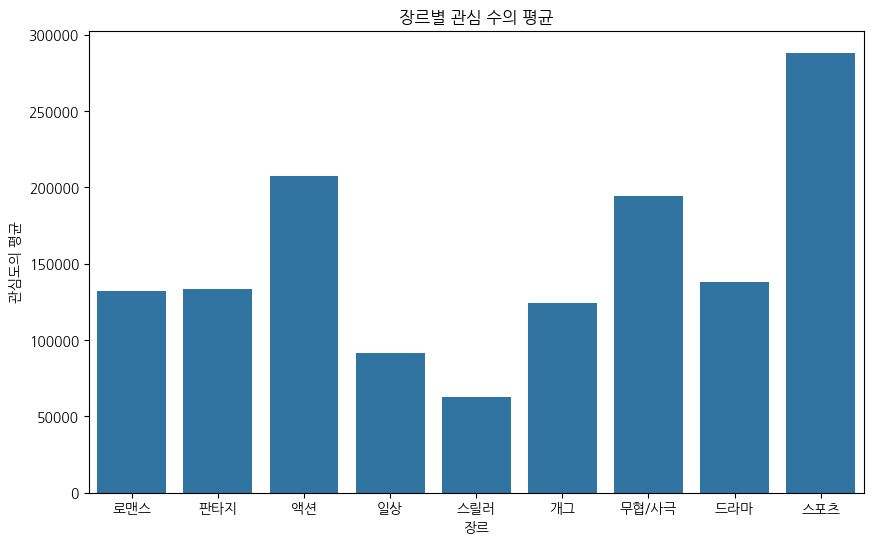

In [212]:
plt.figure(figsize=(10,6))
sns.barplot(data=genre_interest, x='Genre', y='Mean_interest')
plt.title("장르별 관심 수의 평균")
plt.xlabel("장르")
plt.ylabel("관심도의 평균")
plt.show()

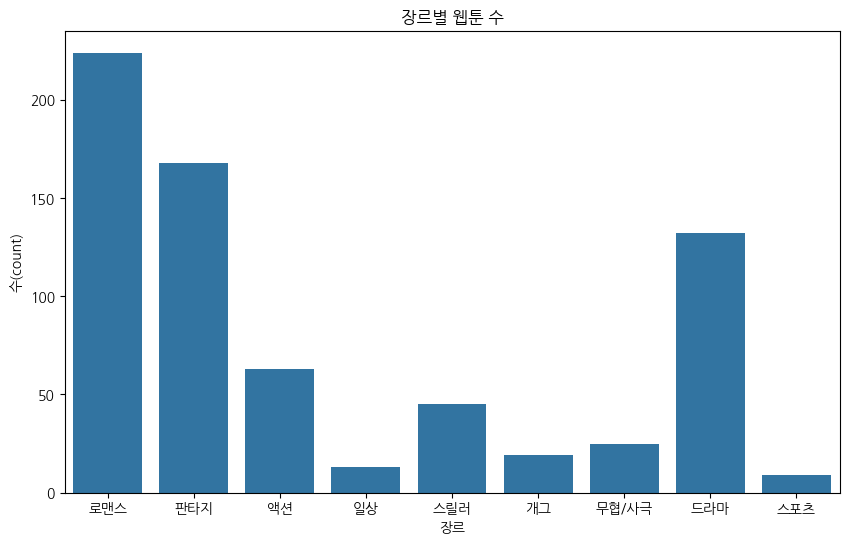

In [213]:
plt.figure(figsize=(10,6))
sns.barplot(data=genre_interest, x='Genre', y='Count_interest')
plt.title("장르별 웹툰 수")
plt.xlabel("장르")
plt.ylabel("수(count)")
plt.show()

연재기간과 관심도의 상관관계 파악

<AxesSubplot: >

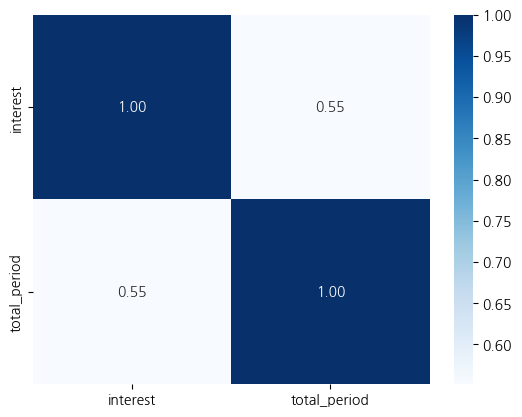

In [160]:
cor = df[["interest", "total_period"]].corr()

sns.heatmap(cor, annot=True, fmt=".2f", cmap="Blues")

In [171]:
# 연재기간에 따라 데이터 나누기
df_1_year = df[df["total_period"] <= 52].copy()
df_2_year = df[(df["total_period"] > 52) & (df["total_period"] <=104)].copy()
df_3_year = df[df["total_period"] > 104].copy()

In [175]:
# 총 629개가 잘 나눠진것을 확인 
display(df_1_year["Name"].count())
display(df_2_year["Name"].count())
display(df_3_year["Name"].count())

294

191

144

1년차

In [229]:
# 태그별 관심 수의 평균값
romance_mean = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].mean()
fantasy_mean = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].mean()
action_mean = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].mean()
daily_mean = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].mean()
thriller_mean = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].mean()
comic_mean = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].mean()
history_mean = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].mean()
drama_mean = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].mean()
sport_mean = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].mean()

romance_count = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].count()
fantasy_count = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].count()
action_count = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].count()
daily_count = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].count()
thriller_count = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].count()
comic_count = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].count()
history_count = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].count()
drama_count = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].count()
sport_count = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].count()

genre_interest_1 = pd.DataFrame({'Genre' : ['로맨스', '판타지', '액션', '일상', '스릴러', '개그', '무협/사극', '드라마', '스포츠'],
                               'Mean_interest' : [romance_mean, fantasy_mean, action_mean, daily_mean, thriller_mean, 
                                                  comic_mean, history_mean, drama_mean, sport_mean],
                               'Count_interest' : [romance_count, fantasy_count, action_count, daily_count, thriller_count, 
                                                   comic_count, history_count, drama_count, sport_count]})

2년차

In [230]:
# 태그별 관심 수의 평균값
romance_mean = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].mean()
fantasy_mean = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].mean()
action_mean = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].mean()
daily_mean = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].mean()
thriller_mean = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].mean()
comic_mean = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].mean()
history_mean = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].mean()
drama_mean = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].mean()
sport_mean = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].mean()

romance_count = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].count()
fantasy_count = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].count()
action_count = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].count()
daily_count = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].count()
thriller_count = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].count()
comic_count = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].count()
history_count = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].count()
drama_count = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].count()
sport_count = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].count()

genre_interest_2 = pd.DataFrame({'Genre' : ['로맨스', '판타지', '액션', '일상', '스릴러', '개그', '무협/사극', '드라마', '스포츠'],
                               'Mean_interest' : [romance_mean, fantasy_mean, action_mean, daily_mean, thriller_mean, 
                                                  comic_mean, history_mean, drama_mean, sport_mean],
                               'Count_interest' : [romance_count, fantasy_count, action_count, daily_count, thriller_count, 
                                                   comic_count, history_count, drama_count, sport_count]})

3년차

In [231]:
# 태그별 관심 수의 평균값
romance_mean = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].mean()
fantasy_mean = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].mean()
action_mean = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].mean()
daily_mean = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].mean()
thriller_mean = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].mean()
comic_mean = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].mean()
history_mean = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].mean()
drama_mean = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].mean()
sport_mean = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].mean()

romance_count = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].count()
fantasy_count = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].count()
action_count = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].count()
daily_count = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].count()
thriller_count = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].count()
comic_count = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].count()
history_count = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].count()
drama_count = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].count()
sport_count = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].count()

genre_interest_3 = pd.DataFrame({'Genre' : ['로맨스', '판타지', '액션', '일상', '스릴러', '개그', '무협/사극', '드라마', '스포츠'],
                               'Mean_interest' : [romance_mean, fantasy_mean, action_mean, daily_mean, thriller_mean, 
                                                  comic_mean, history_mean, drama_mean, sport_mean],
                               'Count_interest' : [romance_count, fantasy_count, action_count, daily_count, thriller_count, 
                                                   comic_count, history_count, drama_count, sport_count]})

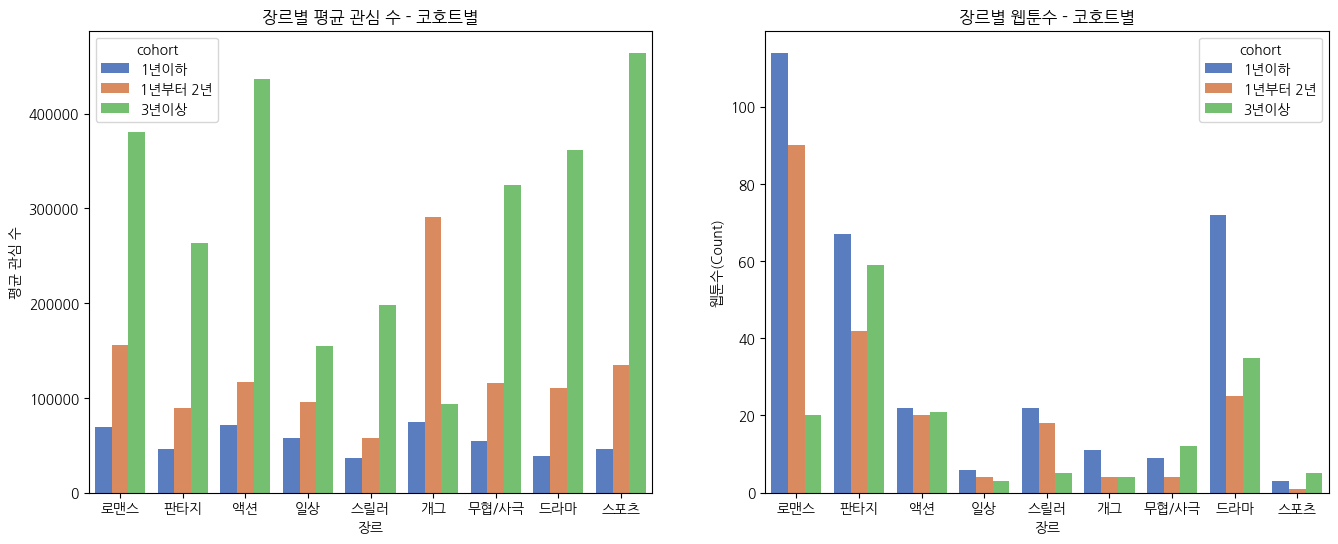

In [311]:
# 각 데이터프레임에 'cohort' 열 추가
genre_interest_1['cohort'] = '1년이하'
genre_interest_2['cohort'] = '1년부터 2년'
genre_interest_3['cohort'] = '3년이상'

# 데이터프레임을 합치기 (concat)
merged_df = pd.concat([genre_interest_1, genre_interest_2, genre_interest_3])

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 첫 번째 subplot (평균 비교)
sns.barplot(x='Genre', y='Mean_interest', hue='cohort', data=merged_df, ax=axes[0], palette='muted')
axes[0].set_title('장르별 평균 관심 수 - 코호트별')
axes[0].set_ylabel('평균 관심 수')
axes[0].set_xlabel('장르')

# 두 번째 subplot (count 비교)
sns.barplot(x='Genre', y='Count_interest', hue='cohort', data=merged_df, ax=axes[1], palette='muted')
axes[1].set_title('장르별 웹툰수 - 코호트별')
axes[1].set_ylabel('웹툰수(Count)')
axes[1].set_xlabel('장르')

plt.show()

In [253]:
# 전체비율 대비 소설 원작 웹툰 수
len_1years = len(df_1_year)
len_target_1years = len(df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "소설원작"))])

len_2years = len(df_2_year)
len_target_2years = len(df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "소설원작"))])

len_3years = len(df_3_year)
len_target_3years = len(df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "소설원작"))])


display(f"[1년 이하]전체 웹툰 수 : {len_1years}, 소설 원작 웹툰 수 : {len_target_1years} ({round((len_target_1years / len_1years)*100,2)}%)")
display(f"[1년 이상, 2년 이하]전체 웹툰 수 : {len_2years}, 소설 원작 웹툰 수 : {len_target_2years} ({round((len_target_2years / len_2years)*100,2)}%)")
display(f"[3년 이상]전체 웹툰 수 : {len_3years}, 소설 원작 웹툰 수 : {len_target_3years} ({round((len_target_3years / len_3years)*100,2)}%)")


'[1년 이하]전체 웹툰 수 : 294, 소설 원작 웹툰 수 : 97 (32.99%)'

'[1년 이상, 2년 이하]전체 웹툰 수 : 191, 소설 원작 웹툰 수 : 71 (37.17%)'

'[3년 이상]전체 웹툰 수 : 144, 소설 원작 웹툰 수 : 34 (23.61%)'

In [319]:
Not_Novel_1_years = df_1_year[~df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "소설원작"))].copy()
Novel_1_years = df_1_year[df_1_year['Tag'].apply(lambda x: all(tag in x for tag in "소설원작"))].copy()

Not_Novel_2_years = df_2_year[~df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "소설원작"))].copy()
Novel_2_years = df_2_year[df_2_year['Tag'].apply(lambda x: all(tag in x for tag in "소설원작"))].copy()

Not_Novel_3_years = df_3_year[~df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "소설원작"))].copy()
Novel_3_years = df_3_year[df_3_year['Tag'].apply(lambda x: all(tag in x for tag in "소설원작"))].copy()

In [320]:
# 각 데이터프레임에 'cohort' 열 추가
Not_Novel_1_years['cohort'] = '1년이하'
Not_Novel_2_years['cohort'] = '1년부터 2년'
Not_Novel_3_years['cohort'] = '3년이상'

Novel_1_years['cohort'] = '1년이하'
Novel_2_years['cohort'] = '1년부터 2년'
Novel_3_years['cohort'] = '3년이상'

# 데이터프레임을 합치기 (concat)
merged_df = pd.concat([Not_Novel_1_years, Not_Novel_2_years, Not_Novel_3_years])
merged_df2 = pd.concat([Novel_1_years, Novel_2_years, Novel_3_years])

In [321]:
# novel 속성을 만들어서 구분
merged_df['novel'] = 'not_novel'
merged_df2['novel'] = 'original_novel'

merged_df3 = pd.concat([merged_df, merged_df2])

In [291]:
# 웹툰들의 관심도 평균 비교(숫자)
display(f'소설원작이 아닌 웹툰들의 관심도의 평균[1년 이하] : {round(Not_Novel_1_years["interest"].mean(),2)}')
display(f'소설원작인 웹툰들의 관심도의 평균[1년 이하] : {round(Novel_1_years["interest"].mean(),2)}')

display("--------------------------------------------------------------------------------------")

display(f'소설원작이 아닌 웹툰들의 관심도의 평균[1년 ~ 2년 이하] : {round(Not_Novel_2_years["interest"].mean(),2)}')
display(f'소설원작인 웹툰들의 관심도의 평균[1년 ~ 2년 이하] : {round(Novel_2_years["interest"].mean(),2)}')

display("--------------------------------------------------------------------------------------")

display(f'소설원작이 아닌 웹툰들의 관심도의 평균[3년 이상] : {round(Not_Novel_3_years["interest"].mean(),2)}')
display(f'소설원작인 웹툰들의 관심도의 평균[3년 이상] : {round(Novel_3_years["interest"].mean(),2)}')

'소설원작이 아닌 웹툰들의 관심도의 평균[1년 이하] : 50349.14'

'소설원작인 웹툰들의 관심도의 평균[1년 이하] : 66304.55'

'--------------------------------------------------------------------------------------'

'소설원작이 아닌 웹툰들의 관심도의 평균[1년 ~ 2년 이하] : 119488.89'

'소설원작인 웹툰들의 관심도의 평균[1년 ~ 2년 이하] : 141429.27'

'--------------------------------------------------------------------------------------'

'소설원작이 아닌 웹툰들의 관심도의 평균[3년 이상] : 315707.45'

'소설원작인 웹툰들의 관심도의 평균[3년 이상] : 329168.0'

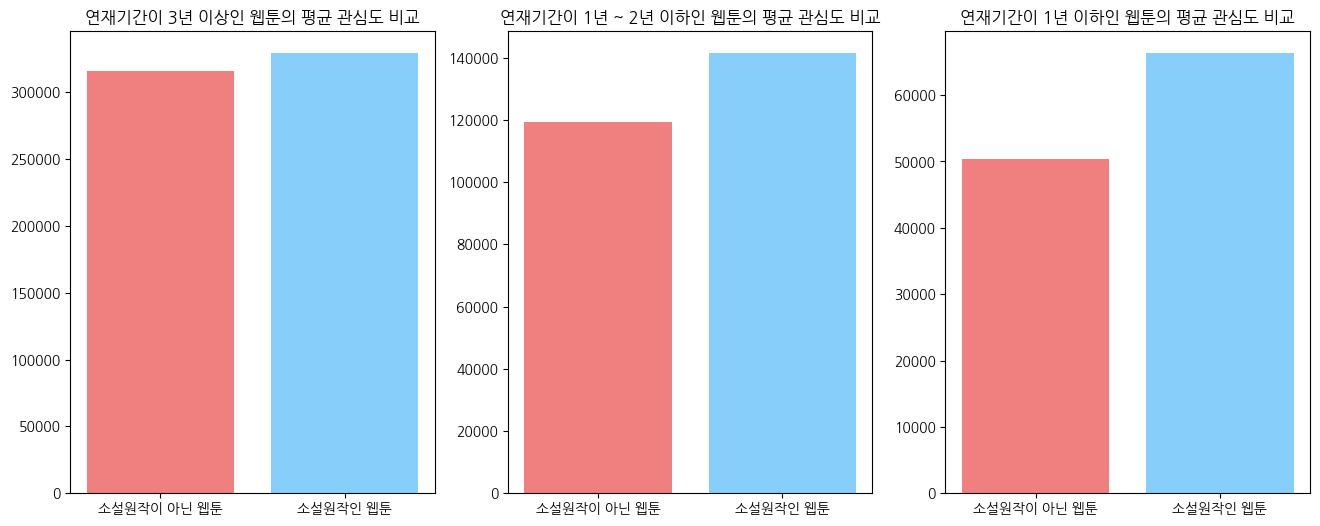

In [46]:
# 데이터
labels1 = ['소설원작이 아닌 웹툰', '소설원작인 웹툰']
values1 = [Not_Novel_1_years["interest"].mean(), Novel_1_years["interest"].mean()]

labels2 = ['소설원작이 아닌 웹툰', '소설원작인 웹툰']
values2 = [Not_Novel_2_years["interest"].mean(), Novel_2_years["interest"].mean()]

labels3 = ['소설원작이 아닌 웹툰', '소설원작인 웹툰']
values3 = [Not_Novel_3_years["interest"].mean(), Novel_3_years["interest"].mean()]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# 막대 그래프 그리기
axes[0].bar(labels3, values3, color=['lightcoral', 'lightskyblue'])
axes[0].set_title('연재기간이 3년 이상인 웹툰의 평균 관심도 비교')

axes[1].bar(labels2, values2, color=['lightcoral', 'lightskyblue'])
axes[1].set_title('연재기간이 1년 ~ 2년 이하인 웹툰의 평균 관심도 비교')

axes[2].bar(labels1, values1, color=['lightcoral', 'lightskyblue'])
axes[2].set_title('연재기간이 1년 이하인 웹툰의 평균 관심도 비교')

plt.show()

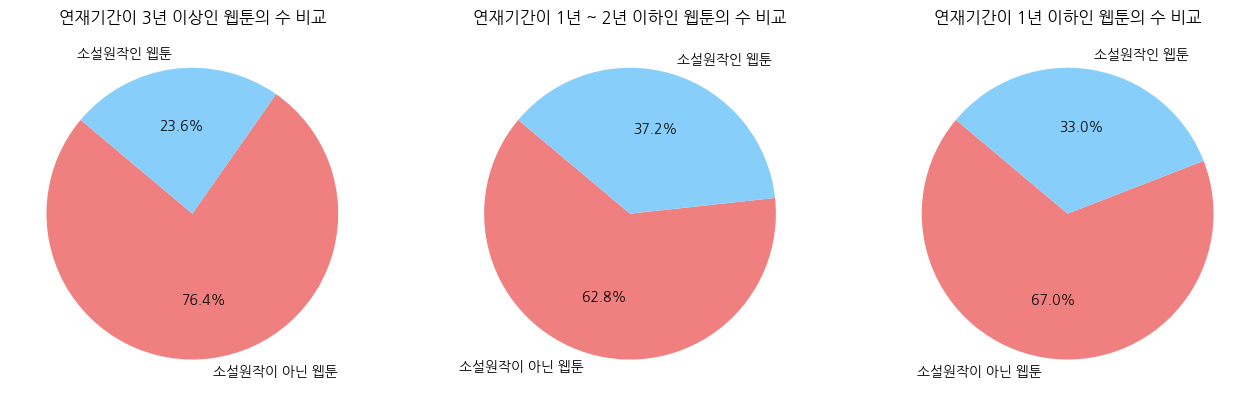

In [310]:
# 데이터
labels1 = ['소설원작이 아닌 웹툰', '소설원작인 웹툰']
values1 = [Not_Novel_1_years["interest"].count(), Novel_1_years["interest"].count()]

labels2 = ['소설원작이 아닌 웹툰', '소설원작인 웹툰']
values2 = [Not_Novel_2_years["interest"].count(), Novel_2_years["interest"].count()]

labels3 = ['소설원작이 아닌 웹툰', '소설원작인 웹툰']
values3 = [Not_Novel_3_years["interest"].count(), Novel_3_years["interest"].count()]

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# 파이 차트 그리기
axes[0].pie(values3, labels=labels3, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
axes[0].set_title('연재기간이 3년 이상인 웹툰의 수 비교')

axes[1].pie(values2, labels=labels2, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
axes[1].set_title('연재기간이 1년 ~ 2년 이하인 웹툰의 수 비교')

axes[2].pie(values1, labels=labels1, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
axes[2].set_title('연재기간이 1년 이하인 웹툰의 수 비교')

plt.show()

Text(0.5, 0, '장르')

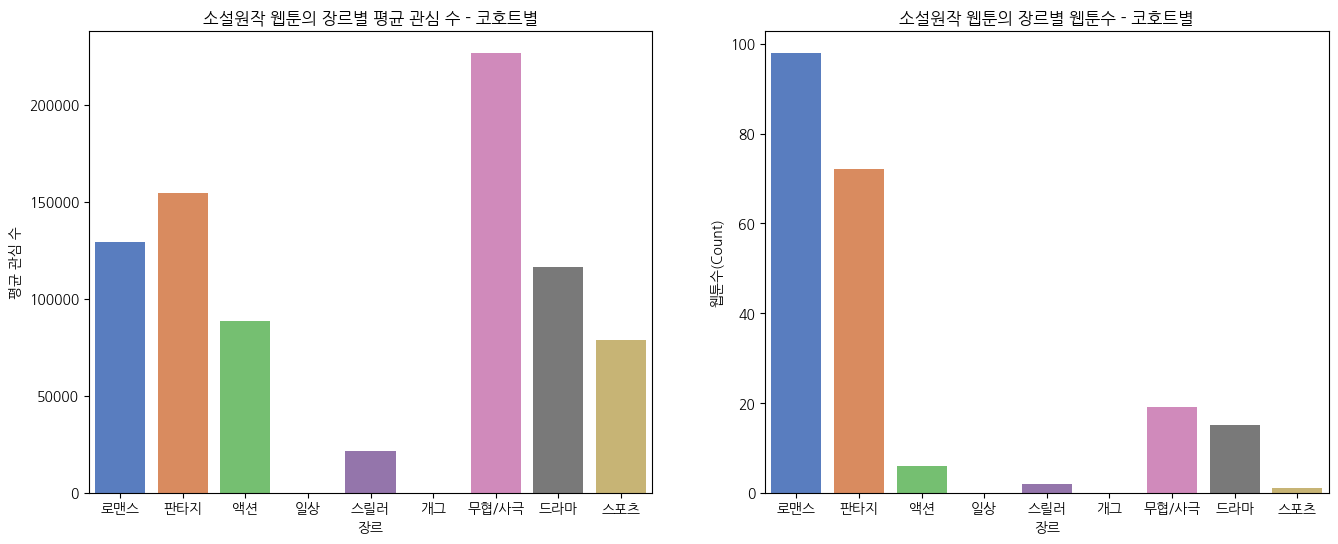

In [313]:
# 태그별 관심 수의 평균값
romance_mean = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].mean()
fantasy_mean = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].mean()
action_mean = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].mean()
daily_mean = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].mean()
thriller_mean = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].mean()
comic_mean = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].mean()
history_mean = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].mean()
drama_mean = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].mean()
sport_mean = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].mean()

romance_count = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].count()
fantasy_count = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].count()
action_count = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].count()
daily_count = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].count()
thriller_count = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].count()
comic_count = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].count()
history_count = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].count()
drama_count = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].count()
sport_count = merged_df2[merged_df2['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].count()

genre_interest = pd.DataFrame({'Genre' : ['로맨스', '판타지', '액션', '일상', '스릴러', '개그', '무협/사극', '드라마', '스포츠'],
                               'Mean_interest' : [romance_mean, fantasy_mean, action_mean, daily_mean, thriller_mean, 
                                                  comic_mean, history_mean, drama_mean, sport_mean],
                               'Count_interest' : [romance_count, fantasy_count, action_count, daily_count, thriller_count, 
                                                   comic_count, history_count, drama_count, sport_count]})

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 첫 번째 subplot (평균 비교)
sns.barplot(x='Genre', y='Mean_interest', data=genre_interest, ax=axes[0], palette='muted')
axes[0].set_title('소설원작 웹툰의 장르별 평균 관심 수 - 코호트별')
axes[0].set_ylabel('평균 관심 수')
axes[0].set_xlabel('장르')

# 두 번째 subplot (count 비교)
sns.barplot(x='Genre', y='Count_interest', data=genre_interest, ax=axes[1], palette='muted')
axes[1].set_title('소설원작 웹툰의 장르별 웹툰수 - 코호트별')
axes[1].set_ylabel('웹툰수(Count)')
axes[1].set_xlabel('장르')

In [318]:
merged_df2

,Name,Tag,interest,count,Day,limit_year,week_count,total_period,cohort,novel
2,망겜의 시체줍는 천재전사,"판타지,게임판타지,소설원작",15737,13,일,12세 이용가,1,13,1년이하,original_novel
25,공녀님의 꽃밭에는 그들이 산다,"로맨스,성장물,햇살캐,러블리,힐링,육아물,로판,소설원작",55810,15,월,전체연령가,1,15,1년이하,original_novel
29,"이러면 안 돼요, 전하!","로맨스,회귀,로판,걸크러시,소설원작",82187,42,목,전체연령가,1,42,1년이하,original_novel
30,회귀자의 은퇴 라이프,"판타지,소설원작",45150,24,토,15세 이용가,1,24,1년이하,original_novel
45,티엔다비스 - 완벽한 구원을 위하여,"로맨스,로판,구원서사,걸크러시,소설원작",15132,16,월,전체연령가,1,16,1년이하,original_novel
...,...,...,...,...,...,...,...,...,...,...
532,장씨세가 호위무사,"무협/사극,사이다,힘숨찐,판무,먼치킨,소설원작",319639,249,월,12세 이용가,1,249,3년이상,original_novel
536,나 혼자 네크로맨서,"판타지,아포칼립스,이능력배틀물,먼치킨,소설원작",216190,115,목,12세 이용가,1,115,3년이상,original_novel
582,"나태 공자, 노력 천재 되다","판타지,환골탈태,소년왕도물,소설원작",239165,108,토,전체연령가,1,108,3년이상,original_novel
603,네가 죽기를 바랄 때가 있었다,"로맨스,후회물,혐관로맨스,로판,구원서사,소설원작",209787,130,목,전체연령가,1,130,3년이상,original_novel


Text(0.5, 0, '장르')

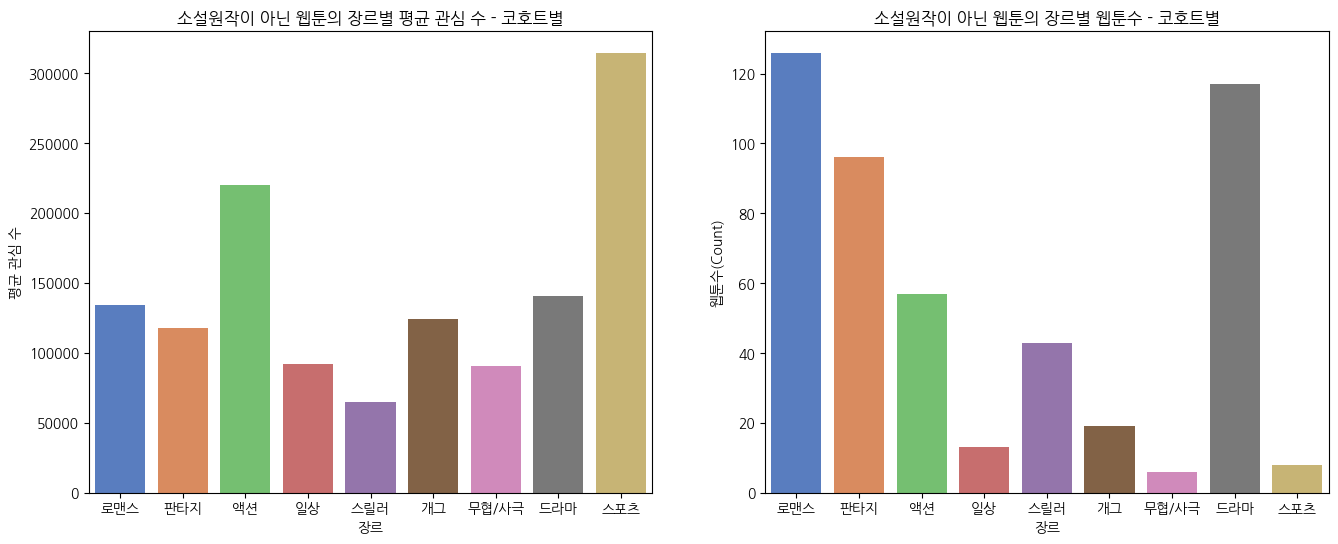

In [322]:
# 태그별 관심 수의 평균값
romance_mean = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].mean()
fantasy_mean = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].mean()
action_mean = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].mean()
daily_mean = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].mean()
thriller_mean = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].mean()
comic_mean = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].mean()
history_mean = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].mean()
drama_mean = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].mean()
sport_mean = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].mean()

romance_count = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "로맨스"))]["interest"].count()
fantasy_count = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "판타지"))]["interest"].count()
action_count = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "액션"))]["interest"].count()
daily_count = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "일상"))]["interest"].count()
thriller_count = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "스릴러"))]["interest"].count()
comic_count = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "개그"))]["interest"].count()
history_count = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "무협/사극"))]["interest"].count()
drama_count = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "드라마"))]["interest"].count()
sport_count = merged_df[merged_df['Tag'].apply(lambda x: all(tag in x for tag in "스포츠"))]["interest"].count()

genre_interest2 = pd.DataFrame({'Genre' : ['로맨스', '판타지', '액션', '일상', '스릴러', '개그', '무협/사극', '드라마', '스포츠'],
                               'Mean_interest' : [romance_mean, fantasy_mean, action_mean, daily_mean, thriller_mean, 
                                                  comic_mean, history_mean, drama_mean, sport_mean],
                               'Count_interest' : [romance_count, fantasy_count, action_count, daily_count, thriller_count, 
                                                   comic_count, history_count, drama_count, sport_count]})

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# 첫 번째 subplot (평균 비교)
sns.barplot(x='Genre', y='Mean_interest', data=genre_interest2, ax=axes[0], palette='muted')
axes[0].set_title('소설원작이 아닌 웹툰의 장르별 평균 관심 수 - 코호트별')
axes[0].set_ylabel('평균 관심 수')
axes[0].set_xlabel('장르')

# 두 번째 subplot (count 비교)
sns.barplot(x='Genre', y='Count_interest', data=genre_interest2, ax=axes[1], palette='muted')
axes[1].set_title('소설원작이 아닌 웹툰의 장르별 웹툰수 - 코호트별')
axes[1].set_ylabel('웹툰수(Count)')
axes[1].set_xlabel('장르')

In [324]:
# 인덱스를 정렬하고 새로운 DataFrame 생성
merged_df3_sorted = merged_df3.reset_index()

# CSV 파일로 저장
merged_df3_sorted.to_csv('refined_webtoon.csv', index=False)